In [126]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [127]:
retail = pd.read_csv("/Users/aakashirengbam/Desktop/CS593/Final Presentation/Final_Presentation _Group _4/Online_Retail.csv")
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [128]:
retail = retail[retail["UnitPrice"] != 0]
retail = retail[retail["Quantity"] > 0]
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [129]:
product = retail["Description"].unique()
invoice = retail["InvoiceNo"].unique()
customer = retail["CustomerID"].unique()
print(len(product))
print(len(invoice))
print(len(customer))

4026
19962
4339


In [130]:
data = pd.DataFrame(columns = product)
data["InvoiceNo"] = invoice
data.set_index("InvoiceNo", inplace = True)
data.head()

,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,ASSORTED COLOUR BIRD ORNAMENT,...,SNACK TRAY PAISLEY PARK,SET OF 6 RIBBONS COUNTRY STYLE,SNACK TRAY RED VINTAGE DOILY,SET OF 6 RIBBONS PERFECTLY PRETTY,SET OF 6 RIBBONS PARTY,SET 10 CARDS SNOWY ROBIN 17099,SET 10 CARDS SWIRLY XMAS TREE 17104,"LETTER ""U"" BLING KEY RING",CREAM HANGING HEART T-LIGHT HOLDER,"PAPER CRAFT , LITTLE BIRDIE"
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
for idx in range(len(retail)):
    r = retail.iloc[idx].InvoiceNo
    c = retail.iloc[idx].Description
    data.at[r,c] = True
data = data.fillna(False)
data.head(10)

,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,ASSORTED COLOUR BIRD ORNAMENT,...,SNACK TRAY PAISLEY PARK,SET OF 6 RIBBONS COUNTRY STYLE,SNACK TRAY RED VINTAGE DOILY,SET OF 6 RIBBONS PERFECTLY PRETTY,SET OF 6 RIBBONS PARTY,SET 10 CARDS SNOWY ROBIN 17099,SET 10 CARDS SWIRLY XMAS TREE 17104,"LETTER ""U"" BLING KEY RING",CREAM HANGING HEART T-LIGHT HOLDER,"PAPER CRAFT , LITTLE BIRDIE"
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,True,True,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536371,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536372,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
536373,True,True,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [196]:
# data.to_csv('cleaned_data.csv')

In [197]:
# data = pd.read_csv("/Users/luoyifu/Desktop/note/593/final/cleaned_data.csv")
# data = data.set_index("InvoiceNo")
# data.head()

In [132]:
# Find frequent itemsets with minimum support of 0.02
frequent_itemsets = apriori(data, min_support=0.02, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets.sort_values(by=['support'], ascending=False)
# Print the frequent itemsets
print(frequent_itemsets)
# frequent_itemsets.to_csv('frequent_itemsets.csv')

      support                              itemsets  length
0    0.113015  (WHITE HANGING HEART T-LIGHT HOLDER)       1
66   0.104649             (JUMBO BAG RED RETROSPOT)       1
163  0.099589            (REGENCY CAKESTAND 3 TIER)       1
235  0.084410                       (PARTY BUNTING)       1
33   0.078349             (LUNCH BAG RED RETROSPOT)       1
..        ...                                   ...     ...
286  0.020188         (BOX OF 6 MINI 50'S CRACKERS)       1
24   0.020188   (WOOD S/3 CABINET ANT WHITE FINISH)       1
220  0.020138         (PINK HAPPY BIRTHDAY BUNTING)       1
88   0.020138         (CHICK GREY HOT WATER BOTTLE)       1
287  0.020088           (VINTAGE CHRISTMAS BUNTING)       1

[378 rows x 3 columns]


In [133]:
most_freq_prod = frequent_itemsets[frequent_itemsets['length'] == 1].head(10)
most_freq_prod

,support,itemsets,length
0,0.113015,(WHITE HANGING HEART T-LIGHT HOLDER),1
66,0.104649,(JUMBO BAG RED RETROSPOT),1
163,0.099589,(REGENCY CAKESTAND 3 TIER),1
235,0.084410,(PARTY BUNTING),1
33,0.078349,(LUNCH BAG RED RETROSPOT),1
4,0.072888,(ASSORTED COLOUR BIRD ORNAMENT),1
246,0.069382,(SET OF 3 CAKE TINS PANTRY DESIGN ),1
36,0.066126,(PACK OF 72 RETROSPOT CAKE CASES),1
114,0.063771,(LUNCH BAG BLACK SKULL.),1
58,0.062569,(NATURAL SLATE HEART CHALKBOARD ),1


In [134]:
x_list = most_freq_prod['itemsets'].reset_index(drop=True)
x_axis = []
for i in range(len(x_list)):
    prod = list(x_list[i])[0]
    x_axis.append(prod)
x_axis

['WHITE HANGING HEART T-LIGHT HOLDER',
 'JUMBO BAG RED RETROSPOT',
 'REGENCY CAKESTAND 3 TIER',
 'PARTY BUNTING',
 'LUNCH BAG RED RETROSPOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'SET OF 3 CAKE TINS PANTRY DESIGN ',
 'PACK OF 72 RETROSPOT CAKE CASES',
 'LUNCH BAG  BLACK SKULL.',
 'NATURAL SLATE HEART CHALKBOARD ']

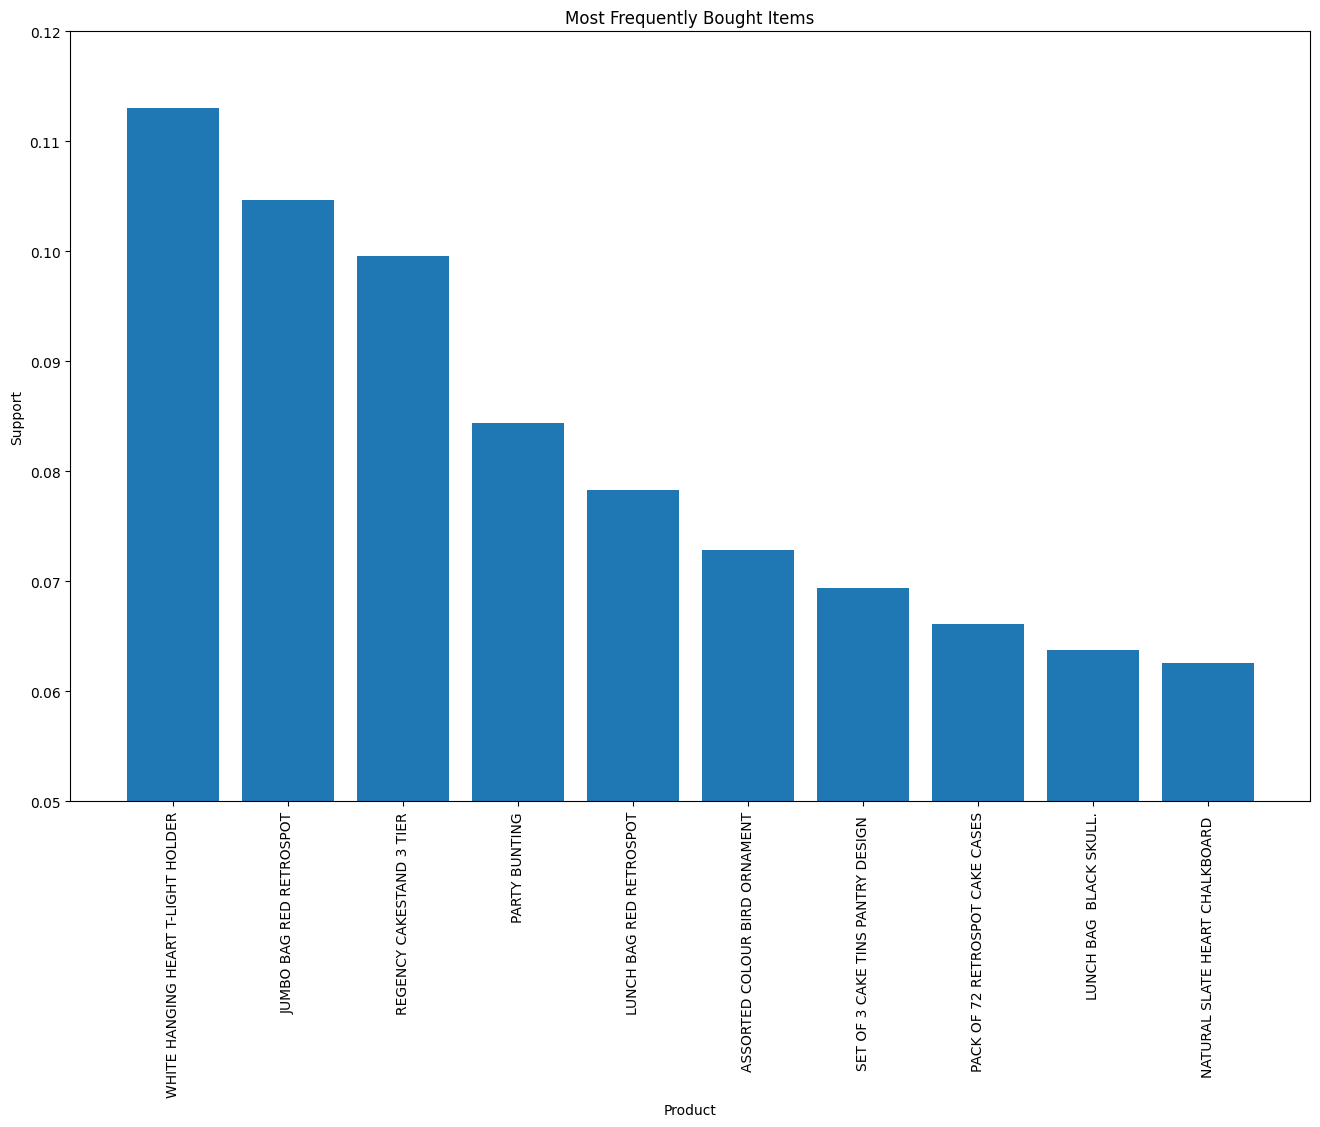

In [135]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(16,10))
plt.bar(x_axis, list(most_freq_prod['support']))
 
plt.xlabel("Product")
plt.xticks(rotation=90)
plt.ylabel("Support")
plt.ylim(0.05, 0.12)
plt.title("Most Frequently Bought Items")
plt.savefig("MFBI.png", dpi = 300)
plt.show()

In [136]:
most_freq_prod_2 = frequent_itemsets[frequent_itemsets['length'] == 2].head(10)
most_freq_prod_2

,support,itemsets,length
310,0.041329,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...",2
362,0.038423,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",2
329,0.036269,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",2
333,0.034065,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",2
323,0.032111,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS...",2
303,0.032061,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",2
364,0.031660,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",2
321,0.030358,"(LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...",2
363,0.029957,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",2
314,0.029306,"(JUMBO BAG RED RETROSPOT, JUMBO BAG BAROQUE B...",2


In [137]:
x_list_2 = most_freq_prod_2['itemsets'].reset_index(drop=True)
x_axis_2 = []
for i in range(len(x_list_2)):
    prod = list(x_list_2[i])[0]+", "+list(x_list_2[i])[1]
    x_axis_2.append(prod)
x_axis_2

['JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT',
 'ROSES REGENCY TEACUP AND SAUCER , GREEN REGENCY TEACUP AND SAUCER',
 'JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT',
 'JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG RED RETROSPOT',
 'LUNCH BAG  BLACK SKULL., LUNCH BAG RED RETROSPOT',
 'ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE RED ',
 'PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER',
 'LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROSPOT',
 'PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER ',
 'JUMBO BAG RED RETROSPOT, JUMBO  BAG BAROQUE BLACK WHITE']

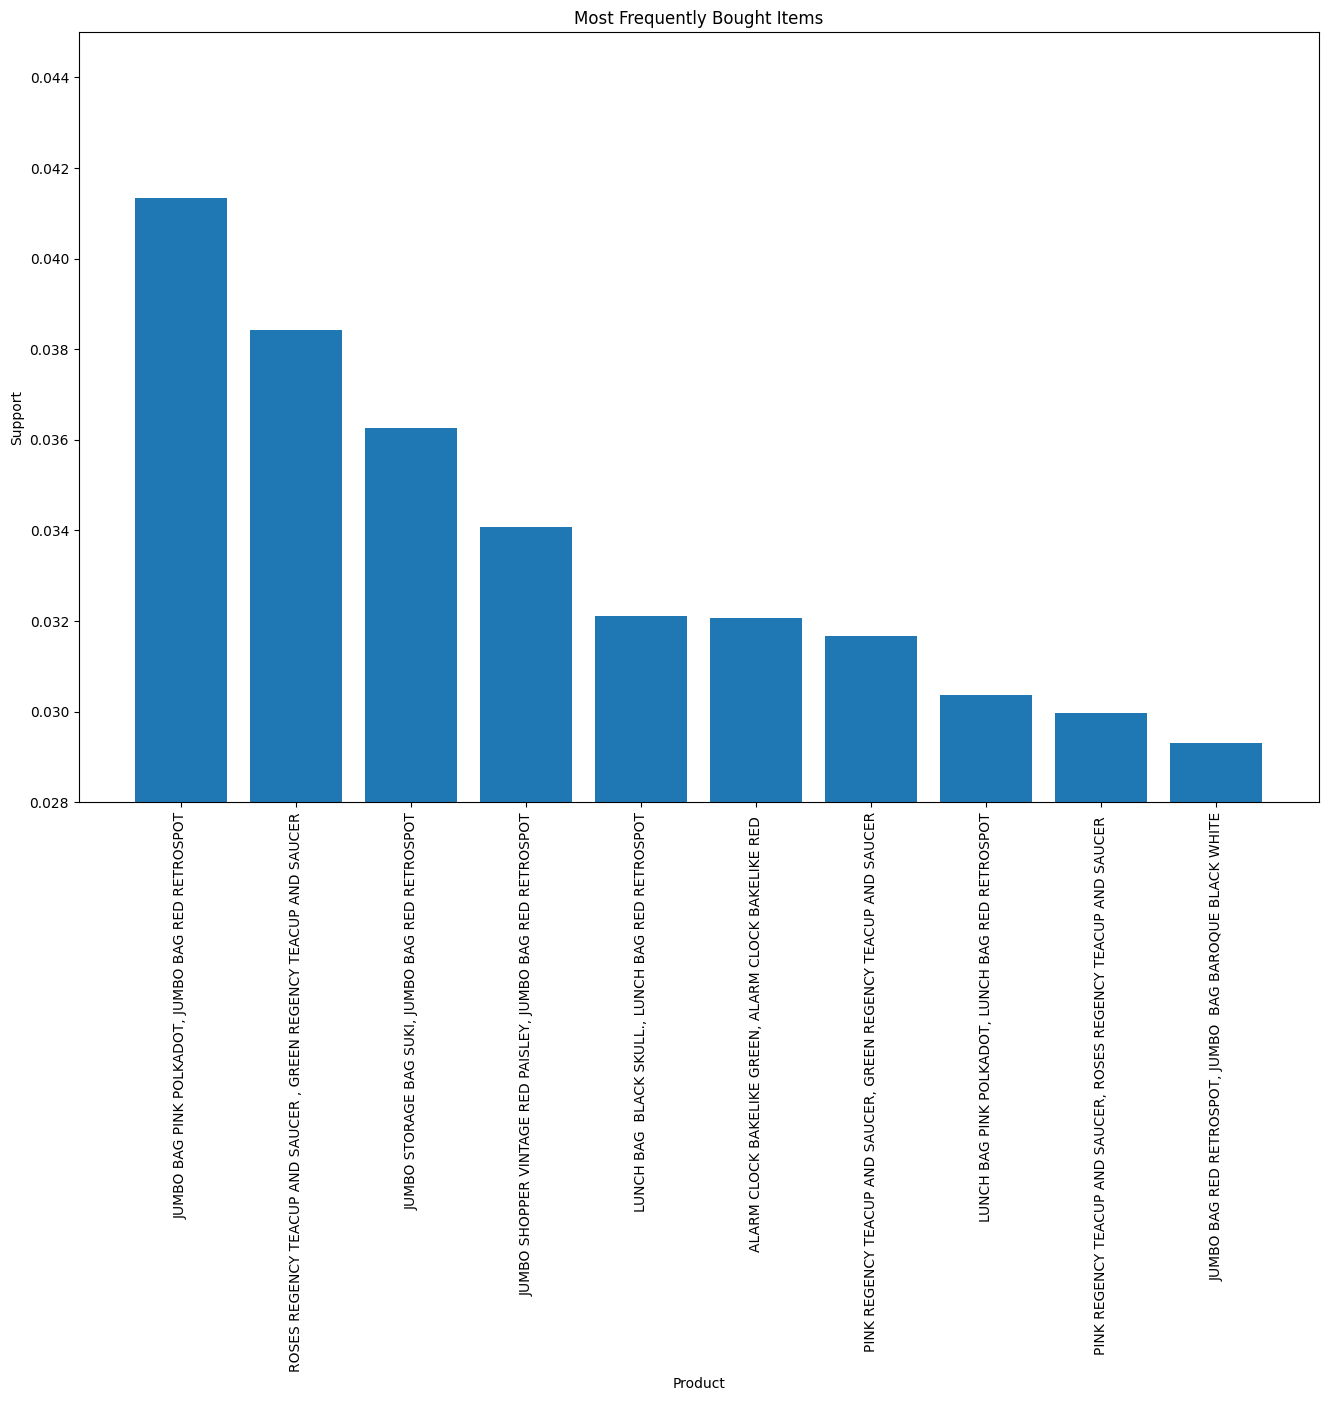

In [138]:
f, ax = plt.subplots(figsize=(16,10))
plt.bar(x_axis_2, list(most_freq_prod_2['support']))
 
plt.xlabel("Product")
plt.xticks(rotation=90)
plt.ylabel("Support")
plt.ylim(0.028, 0.045)
plt.title("Most Frequently Bought Items")
plt.savefig("FBI.png", dpi = 300)
plt.show()

In [150]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by=['lift'], ascending=False)
print(len(rules))
rules.head(20)
# rules.to_csv('rules.csv')

176


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
37,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.038423,0.038323,0.027101,0.705346,18.405369,0.025629,3.263745,0.983455
40,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.038323,0.038423,0.027101,0.707190,18.405369,0.025629,3.283957,0.983353
39,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.050746,0.029957,0.027101,0.534057,17.827510,0.025581,2.081893,0.994368
38,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.029957,0.050746,0.027101,0.904682,17.827510,0.025581,9.958836,0.973057
13,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050746,0.038323,0.031660,0.623889,16.279844,0.029715,2.556900,0.988750
12,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038323,0.050746,0.031660,0.826144,16.279844,0.029715,5.459992,0.975977
41,(ROSES REGENCY TEACUP AND SAUCER ),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.053351,0.031660,0.027101,0.507981,16.044812,0.025412,1.968095,0.990520
36,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.031660,0.053351,0.027101,0.856013,16.044812,0.025412,6.574527,0.968332
30,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.045737,0.037972,0.027352,0.598028,15.749135,0.025615,2.393274,0.981390
31,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.037972,0.045737,0.027352,0.720317,15.749135,0.025615,3.411941,0.973469


In [140]:
frequent_itemsets_1 = apriori(data, min_support=0.01, use_colnames=True)
frequent_itemsets_1['length'] = frequent_itemsets_1['itemsets'].apply(lambda x: len(x))
frequent_itemsets_1 = frequent_itemsets_1.sort_values(by=['support'], ascending=False)

rules_1=association_rules(frequent_itemsets_1, metric="lift", min_threshold=1)
rules_1 = rules_1.sort_values(by=['lift'], ascending=False)
print("min_support = 0.01 => # of rules: ", len(rules_1))
a = len(rules_1)

frequent_itemsets_2 = apriori(data, min_support=0.02, use_colnames=True)
frequent_itemsets_2['length'] = frequent_itemsets_2['itemsets'].apply(lambda x: len(x))
frequent_itemsets_2 = frequent_itemsets_2.sort_values(by=['support'], ascending=False)


rules_2 =association_rules(frequent_itemsets_2, metric="lift", min_threshold=1)
rules_2 = rules_2.sort_values(by=['lift'], ascending=False)
print("min_support = 0.02 => # of rules: ", len(rules_2))
b = len(rules_2)


frequent_itemsets_3 = apriori(data, min_support=0.03, use_colnames=True)
frequent_itemsets_3['length'] = frequent_itemsets_3['itemsets'].apply(lambda x: len(x))
frequent_itemsets_3 = frequent_itemsets_3.sort_values(by=['support'], ascending=False)

rules_3=association_rules(frequent_itemsets_3, metric="lift", min_threshold=1)
rules_3 = rules_3.sort_values(by=['lift'], ascending=False)
print("min_support = 0.03 => # of rules: ", len(rules_3))
c = len(rules_3)


frequent_itemsets_4 = apriori(data, min_support=0.04, use_colnames=True)
frequent_itemsets_4['length'] = frequent_itemsets_4['itemsets'].apply(lambda x: len(x))
frequent_itemsets_4 = frequent_itemsets_4.sort_values(by=['support'], ascending=False)


rules_4=association_rules(frequent_itemsets_4, metric="lift", min_threshold=1)
rules_4 = rules_4.sort_values(by=['lift'], ascending=False)
print("min_support = 0.04 => # of rules: ", len(rules_4))
d = len(rules_4)


min_support = 0.01 => # of rules:  3360
min_support = 0.02 => # of rules:  176
min_support = 0.03 => # of rules:  16
min_support = 0.04 => # of rules:  2


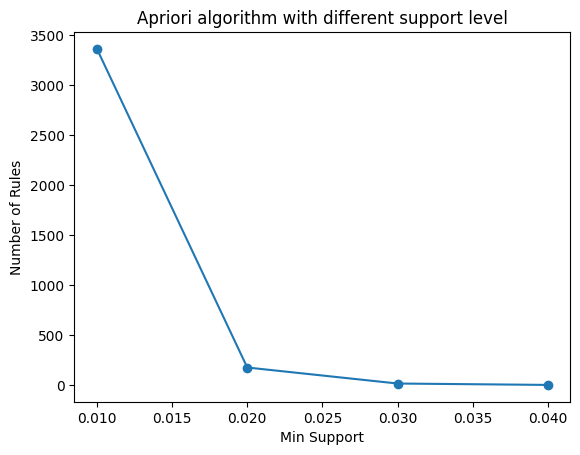

In [141]:
plt.plot([0.01, 0.02, 0.03, 0.04], [a,b,c,d], marker='o')
plt.xlabel("Min Support")
plt.ylabel("Number of Rules")
plt.title("Apriori algorithm with different support level")
plt.savefig("APA.png", dpi = 300)
plt.show()

In [142]:
products = []
for idx in range(len(rules)):
    prod_frozenset = list(rules.iloc[idx].antecedents)
    for i in range(len(prod_frozenset)):
        if (prod_frozenset[i] in products):
            pass
        else:
            products.append(prod_frozenset[i])
print(len(products))
products

59


['ROSES REGENCY TEACUP AND SAUCER ',
 'GREEN REGENCY TEACUP AND SAUCER',
 'PINK REGENCY TEACUP AND SAUCER',
 'GARDENERS KNEELING PAD KEEP CALM ',
 'GARDENERS KNEELING PAD CUP OF TEA ',
 'REGENCY CAKESTAND 3 TIER',
 'DOLLY GIRL LUNCH BOX',
 'SPACEBOY LUNCH BOX ',
 'JUMBO BAG PEARS',
 'JUMBO BAG APPLES',
 'CHARLOTTE BAG PINK POLKADOT',
 'RED RETROSPOT CHARLOTTE BAG',
 'WOODLAND CHARLOTTE BAG',
 'STRAWBERRY CHARLOTTE BAG',
 'CHARLOTTE BAG SUKI DESIGN',
 'ALARM CLOCK BAKELIKE GREEN',
 'ALARM CLOCK BAKELIKE RED ',
 'PAPER CHAIN KIT VINTAGE CHRISTMAS',
 "PAPER CHAIN KIT 50'S CHRISTMAS ",
 'ALARM CLOCK BAKELIKE PINK',
 'WOODEN FRAME ANTIQUE WHITE ',
 'WOODEN PICTURE FRAME WHITE FINISH',
 'JUMBO BAG PINK POLKADOT',
 'JUMBO STORAGE BAG SUKI',
 'JUMBO BAG RED RETROSPOT',
 'HEART OF WICKER SMALL',
 'HEART OF WICKER LARGE',
 'JUMBO BAG WOODLAND ANIMALS',
 'PACK OF 72 RETROSPOT CAKE CASES',
 '60 TEATIME FAIRY CAKE CASES',
 'JUMBO BAG PINK VINTAGE PAISLEY',
 'JUMBO SHOPPER VINTAGE RED PAISLEY',
 'LU

In [143]:
import matplotlib.pyplot as plt
import networkx as nx
G=nx.DiGraph()

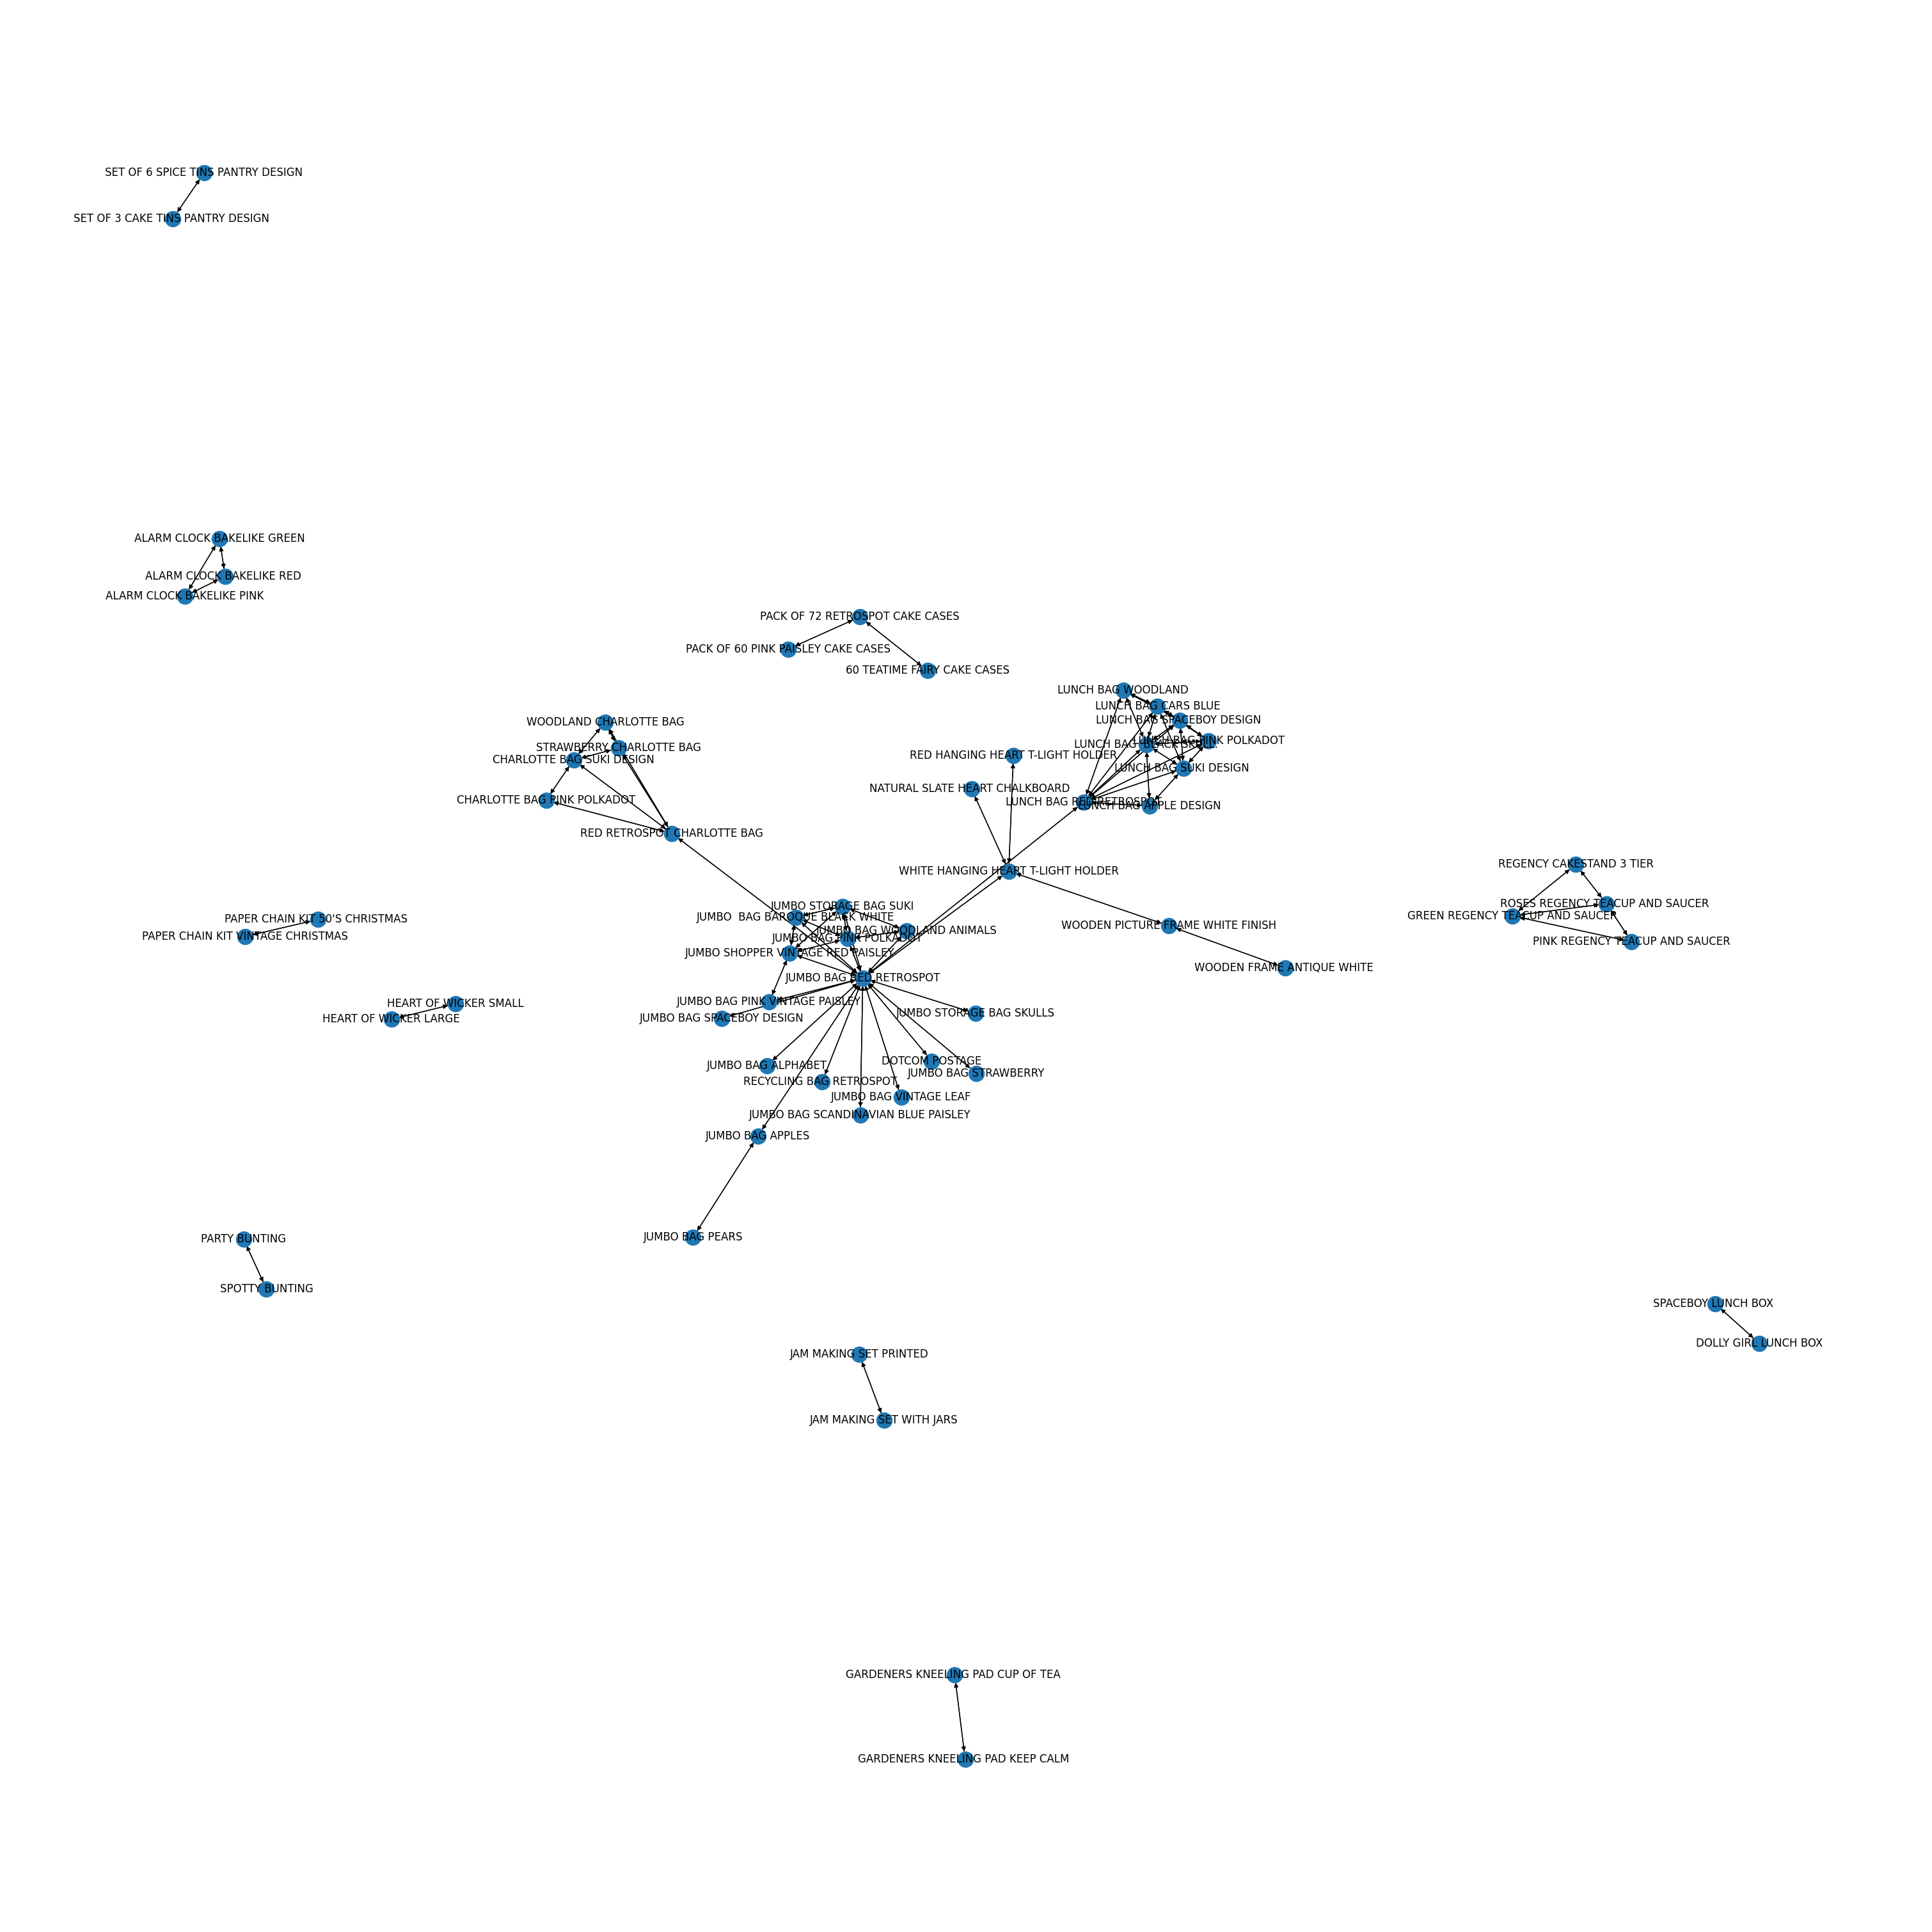

In [144]:
from networkx.drawing.nx_pydot import write_dot
import numpy as np
for idx in range(len(rules)):
    antecedents = list(rules.iloc[idx].antecedents)
    consequents = list(rules.iloc[idx].consequents)
    for i in range(len(antecedents)):
        x = antecedents[i]
        for j in range(len(consequents)):
            y = consequents[j]
            G.add_edges_from([(x,y)])
pos = nx.spring_layout(G, k = 0.7*1/np.sqrt(len(G.nodes())), iterations = 20)
plt.figure(3, figsize = (30, 30))
nx.draw(G, pos = pos)
nx.draw_networkx_labels(G, pos = pos)
plt.savefig("FP.png", dpi = 300)
plt.show()

In [145]:
product_1 = ['REGENCY CAKESTAND 3 TIER',
 'JUMBO BAG APPLES',
 'JUMBO BAG PEARS',
 'CHARLOTTE BAG PINK POLKADOT',
 'RED RETROSPOT CHARLOTTE BAG',
 'STRAWBERRY CHARLOTTE BAG',
 'WOODLAND CHARLOTTE BAG',
 'CHARLOTTE BAG SUKI DESIGN',
 'WOODEN PICTURE FRAME WHITE FINISH',
 'WOODEN FRAME ANTIQUE WHITE ',
 'JUMBO BAG RED RETROSPOT',
 'JUMBO STORAGE BAG SUKI',
 'JUMBO BAG PINK POLKADOT',
 'JUMBO BAG WOODLAND ANIMALS',
 'JUMBO BAG PINK VINTAGE PAISLEY',
 'JUMBO SHOPPER VINTAGE RED PAISLEY',
 'JUMBO  BAG BAROQUE BLACK WHITE',
 'DOTCOM POSTAGE',
 'JUMBO BAG SCANDINAVIAN BLUE PAISLEY',
 'JUMBO BAG STRAWBERRY',
 'JUMBO BAG SPACEBOY DESIGN',
 'WHITE HANGING HEART T-LIGHT HOLDER',
 'RED HANGING HEART T-LIGHT HOLDER',
 'JUMBO STORAGE BAG SKULLS',
 'RECYCLING BAG RETROSPOT ',
 'JUMBO BAG VINTAGE LEAF',
 'JUMBO BAG ALPHABET',
 'NATURAL SLATE HEART CHALKBOARD ']

product_2 = ['ROSES REGENCY TEACUP AND SAUCER ',
 'GREEN REGENCY TEACUP AND SAUCER',
 'PINK REGENCY TEACUP AND SAUCER']

product_3 = ['LUNCH BAG SPACEBOY DESIGN ',
 'LUNCH BAG WOODLAND',
 'LUNCH BAG CARS BLUE',
 'LUNCH BAG PINK POLKADOT',
 'LUNCH BAG APPLE DESIGN',
 'LUNCH BAG SUKI DESIGN ',
 'LUNCH BAG  BLACK SKULL.']


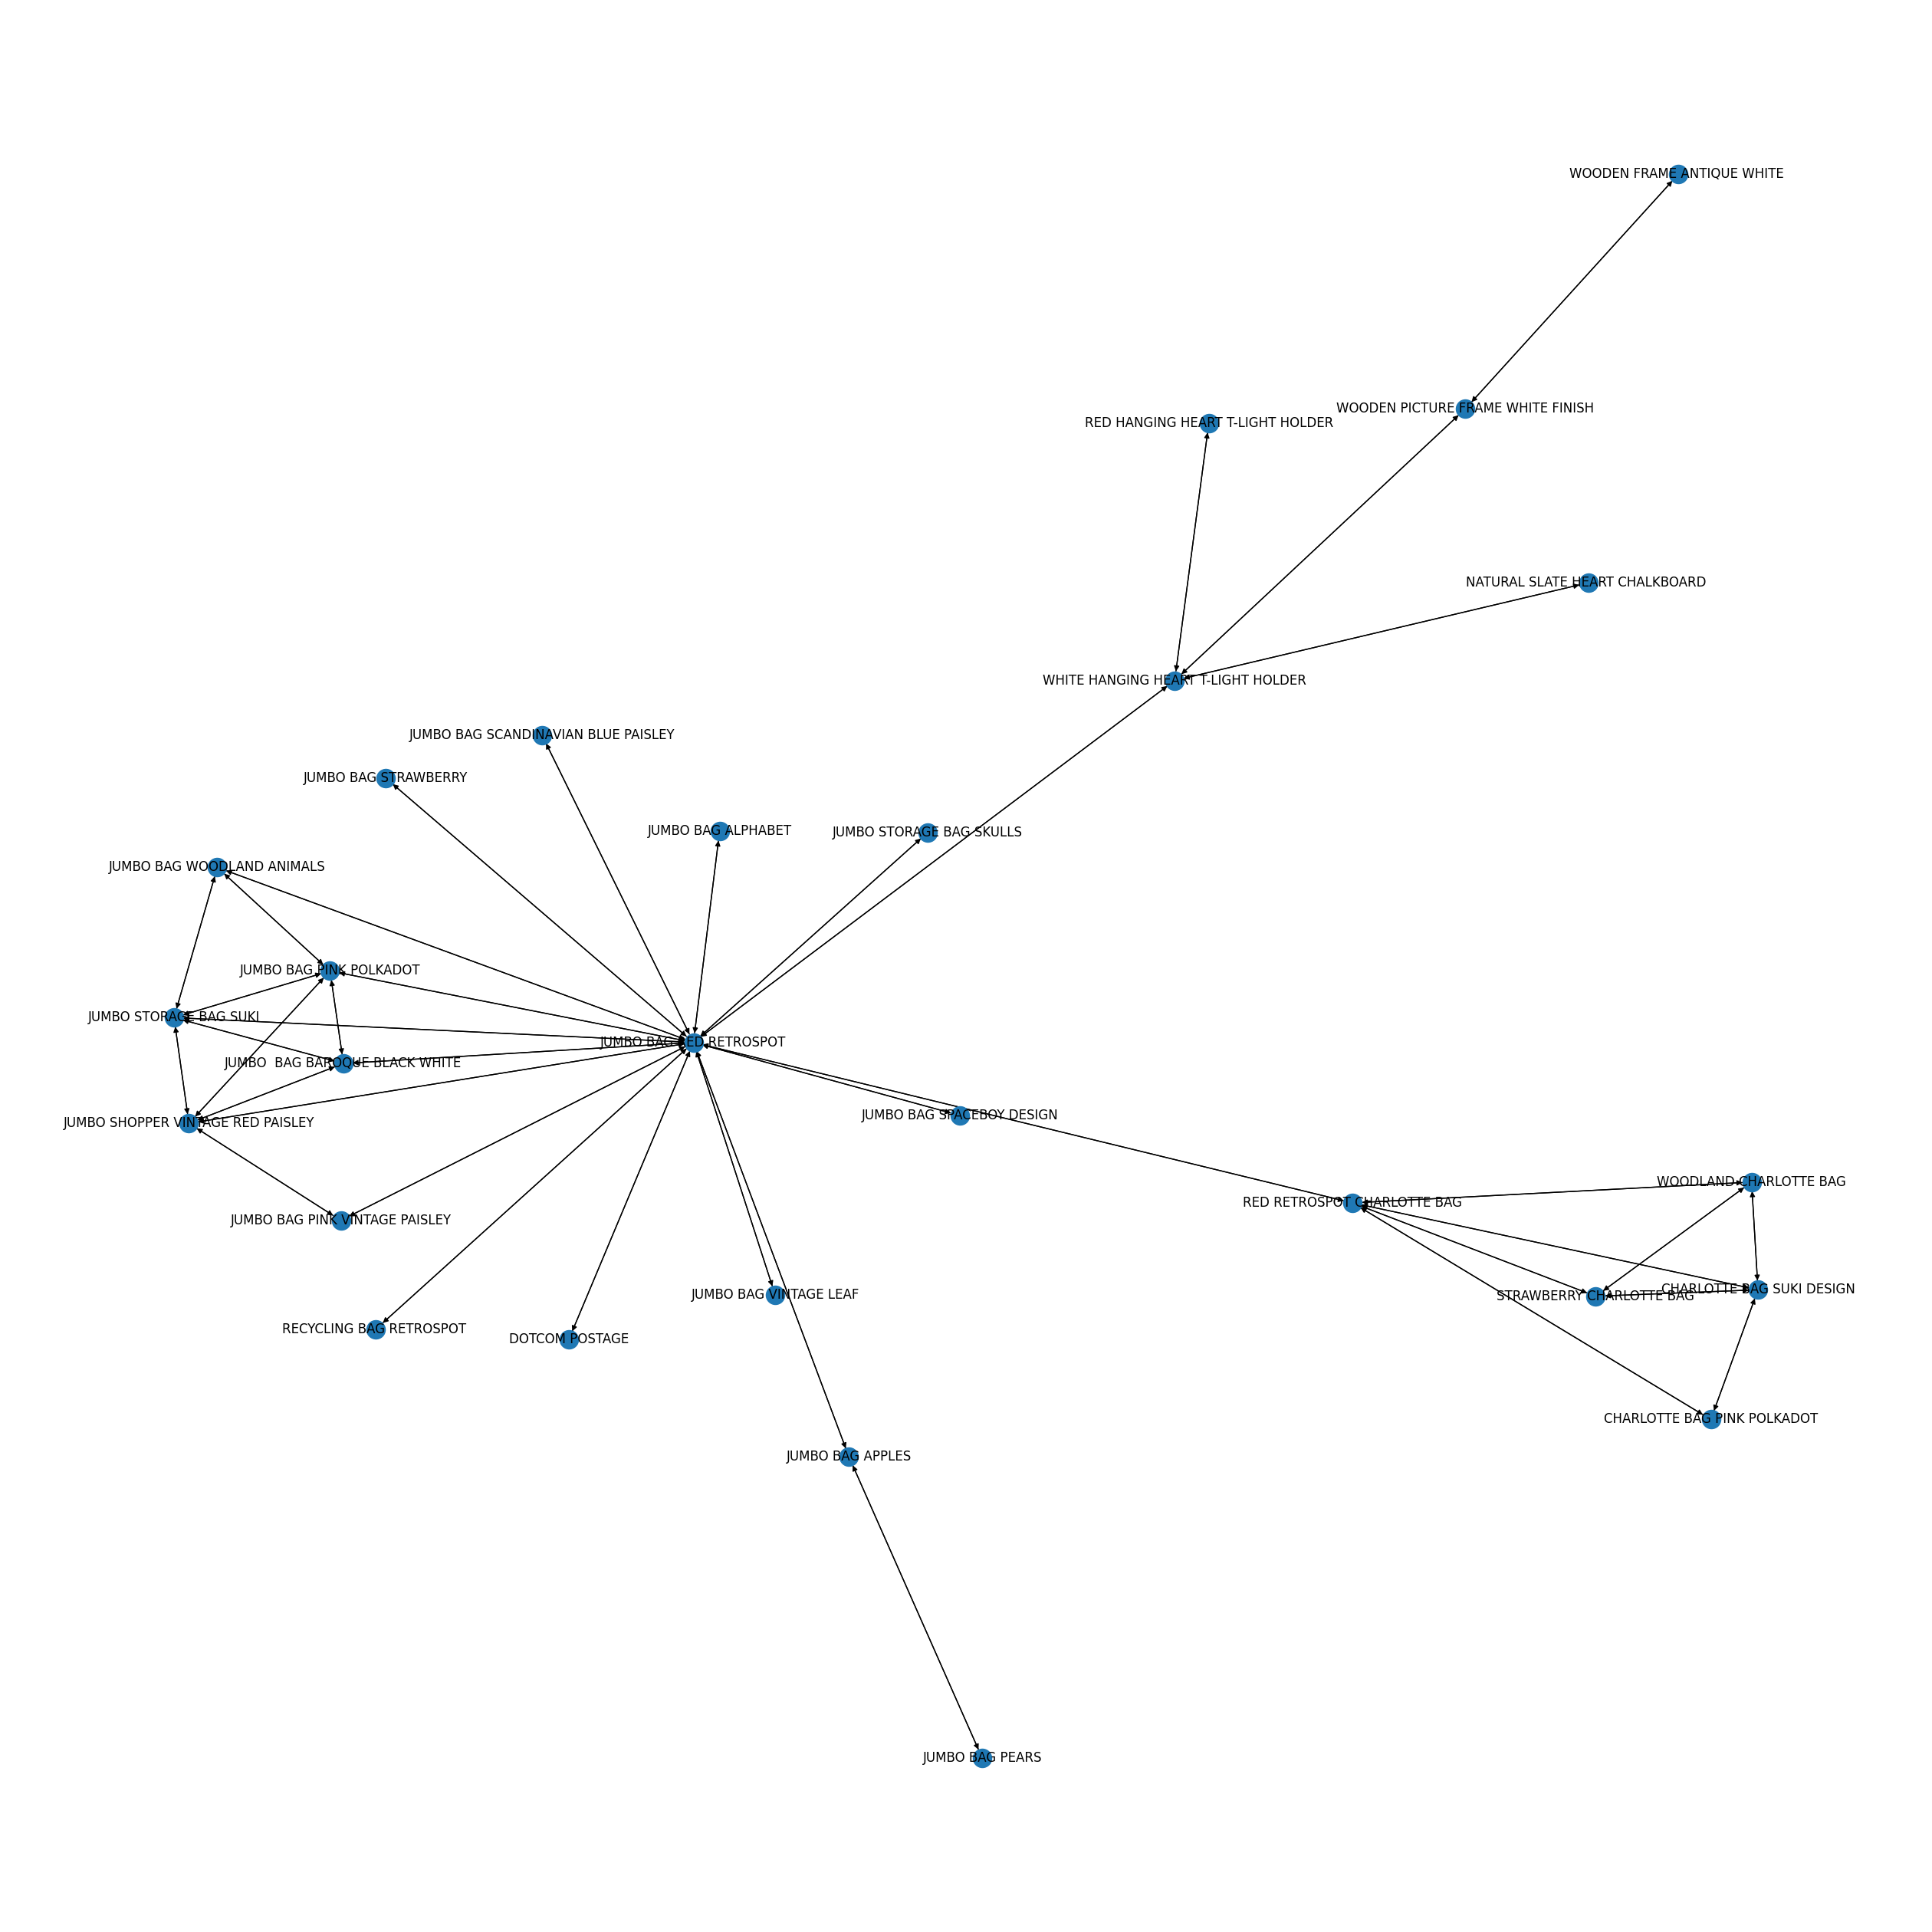

In [146]:
G=nx.DiGraph()
for idx in range(len(rules)):
    antecedents = list(rules.iloc[idx].antecedents)
    consequents = list(rules.iloc[idx].consequents)
    for i in range(len(antecedents)):
        x = antecedents[i]
        for j in range(len(consequents)):
            y = consequents[j]
            if x in product_1 and y in product_1:
                G.add_edges_from([(x,y)])
pos = nx.spring_layout(G, k = 0.3*1/np.sqrt(len(G.nodes())), iterations = 20)
plt.figure(3, figsize = (25, 25))
nx.draw(G, pos = pos)
nx.draw_networkx_labels(G, pos = pos)
plt.savefig("FP1.png", dpi = 300)
plt.show() # display

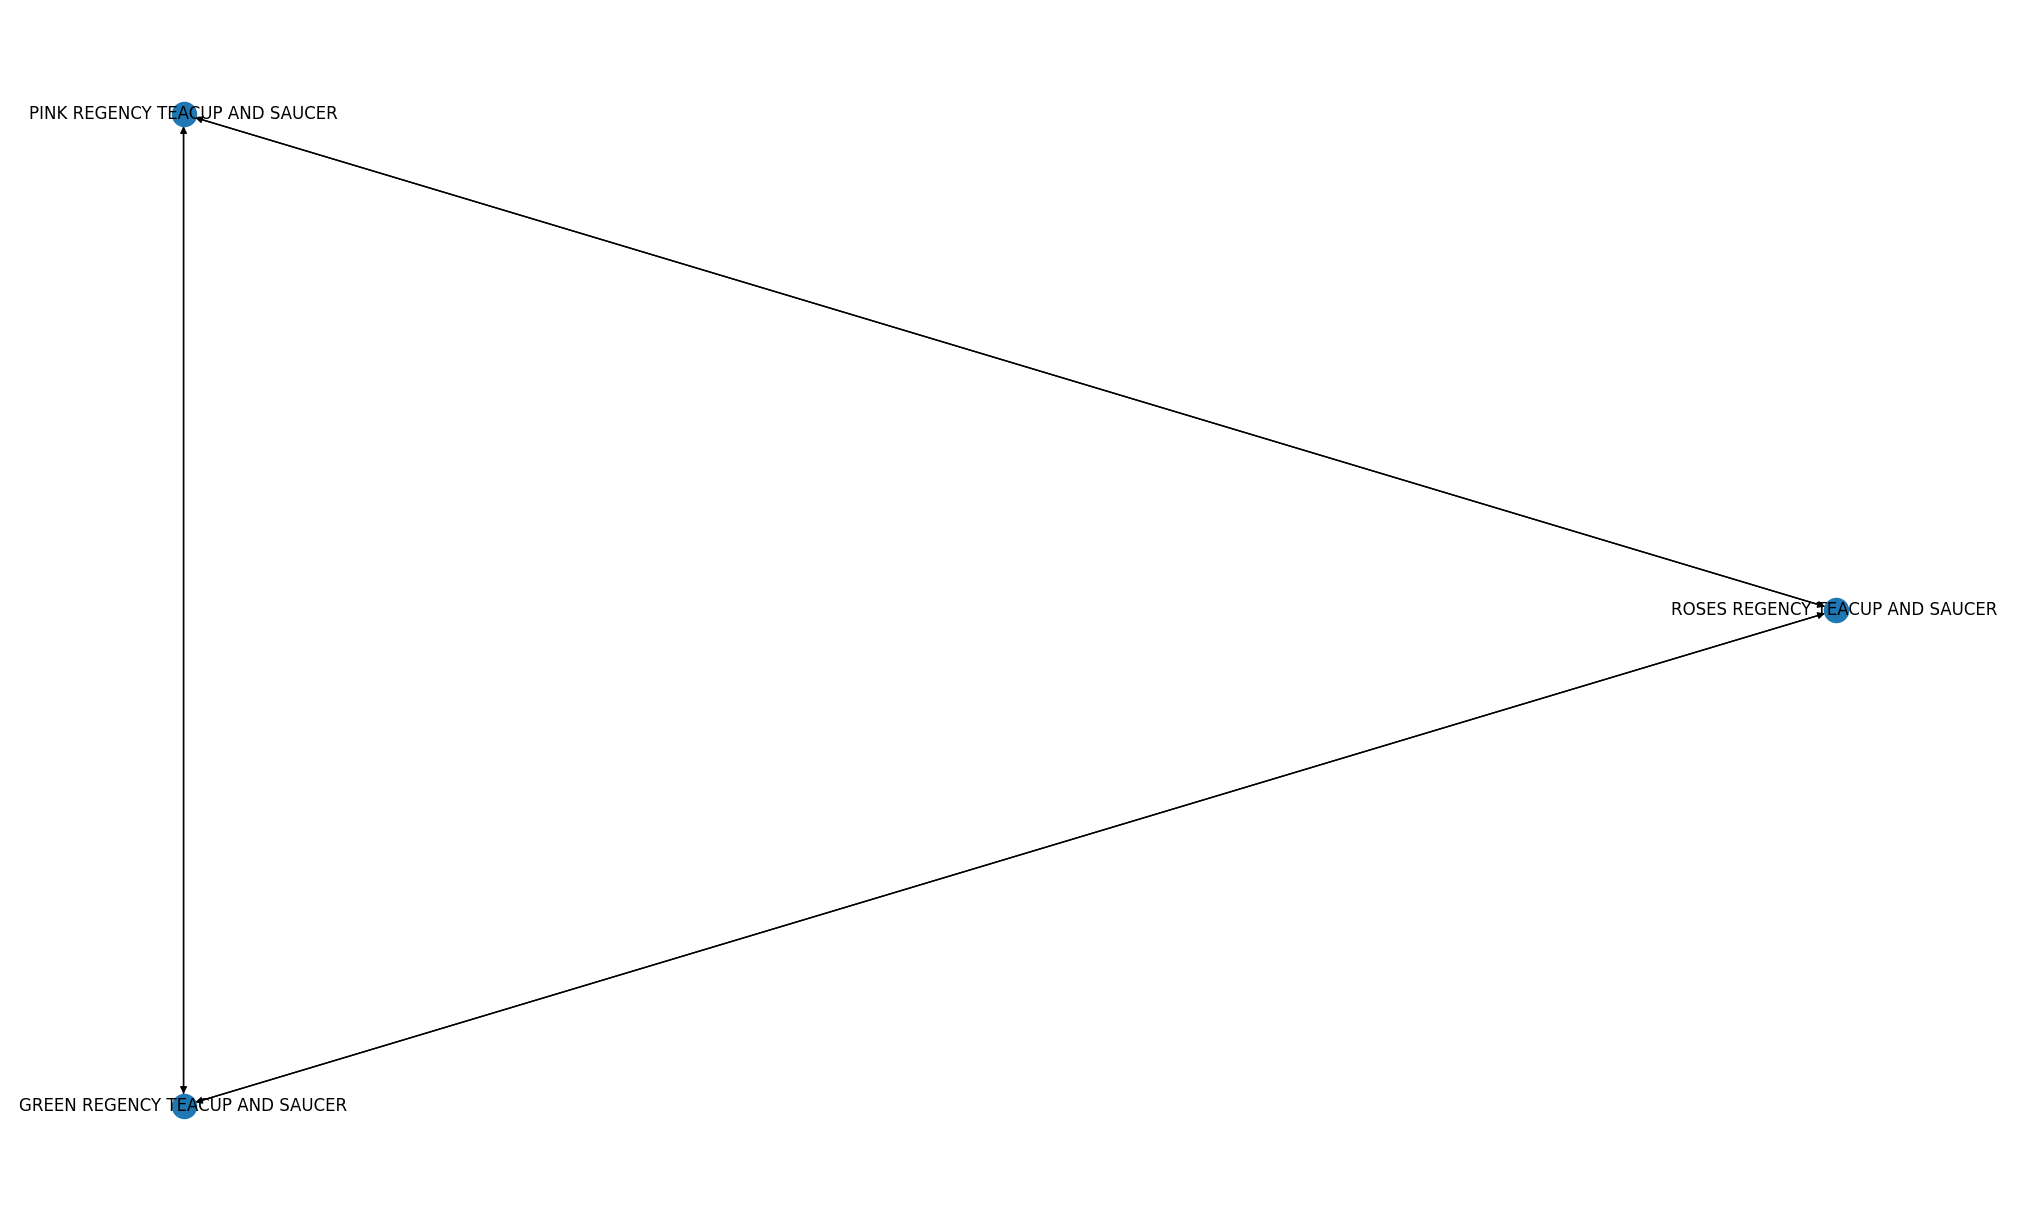

In [147]:
G=nx.DiGraph()
for idx in range(len(rules)):
    antecedents = list(rules.iloc[idx].antecedents)
    consequents = list(rules.iloc[idx].consequents)
    for i in range(len(antecedents)):
        x = antecedents[i]
        for j in range(len(consequents)):
            y = consequents[j]
            if x in product_2 and y in product_2:
                G.add_edges_from([(x,y)])
pos = nx.kamada_kawai_layout(G)
plt.figure(3, figsize = (20, 12))
nx.draw(G, pos = pos)
nx.draw_networkx_labels(G, pos = pos)
plt.savefig("FP2.png", dpi = 300)
plt.show() # display

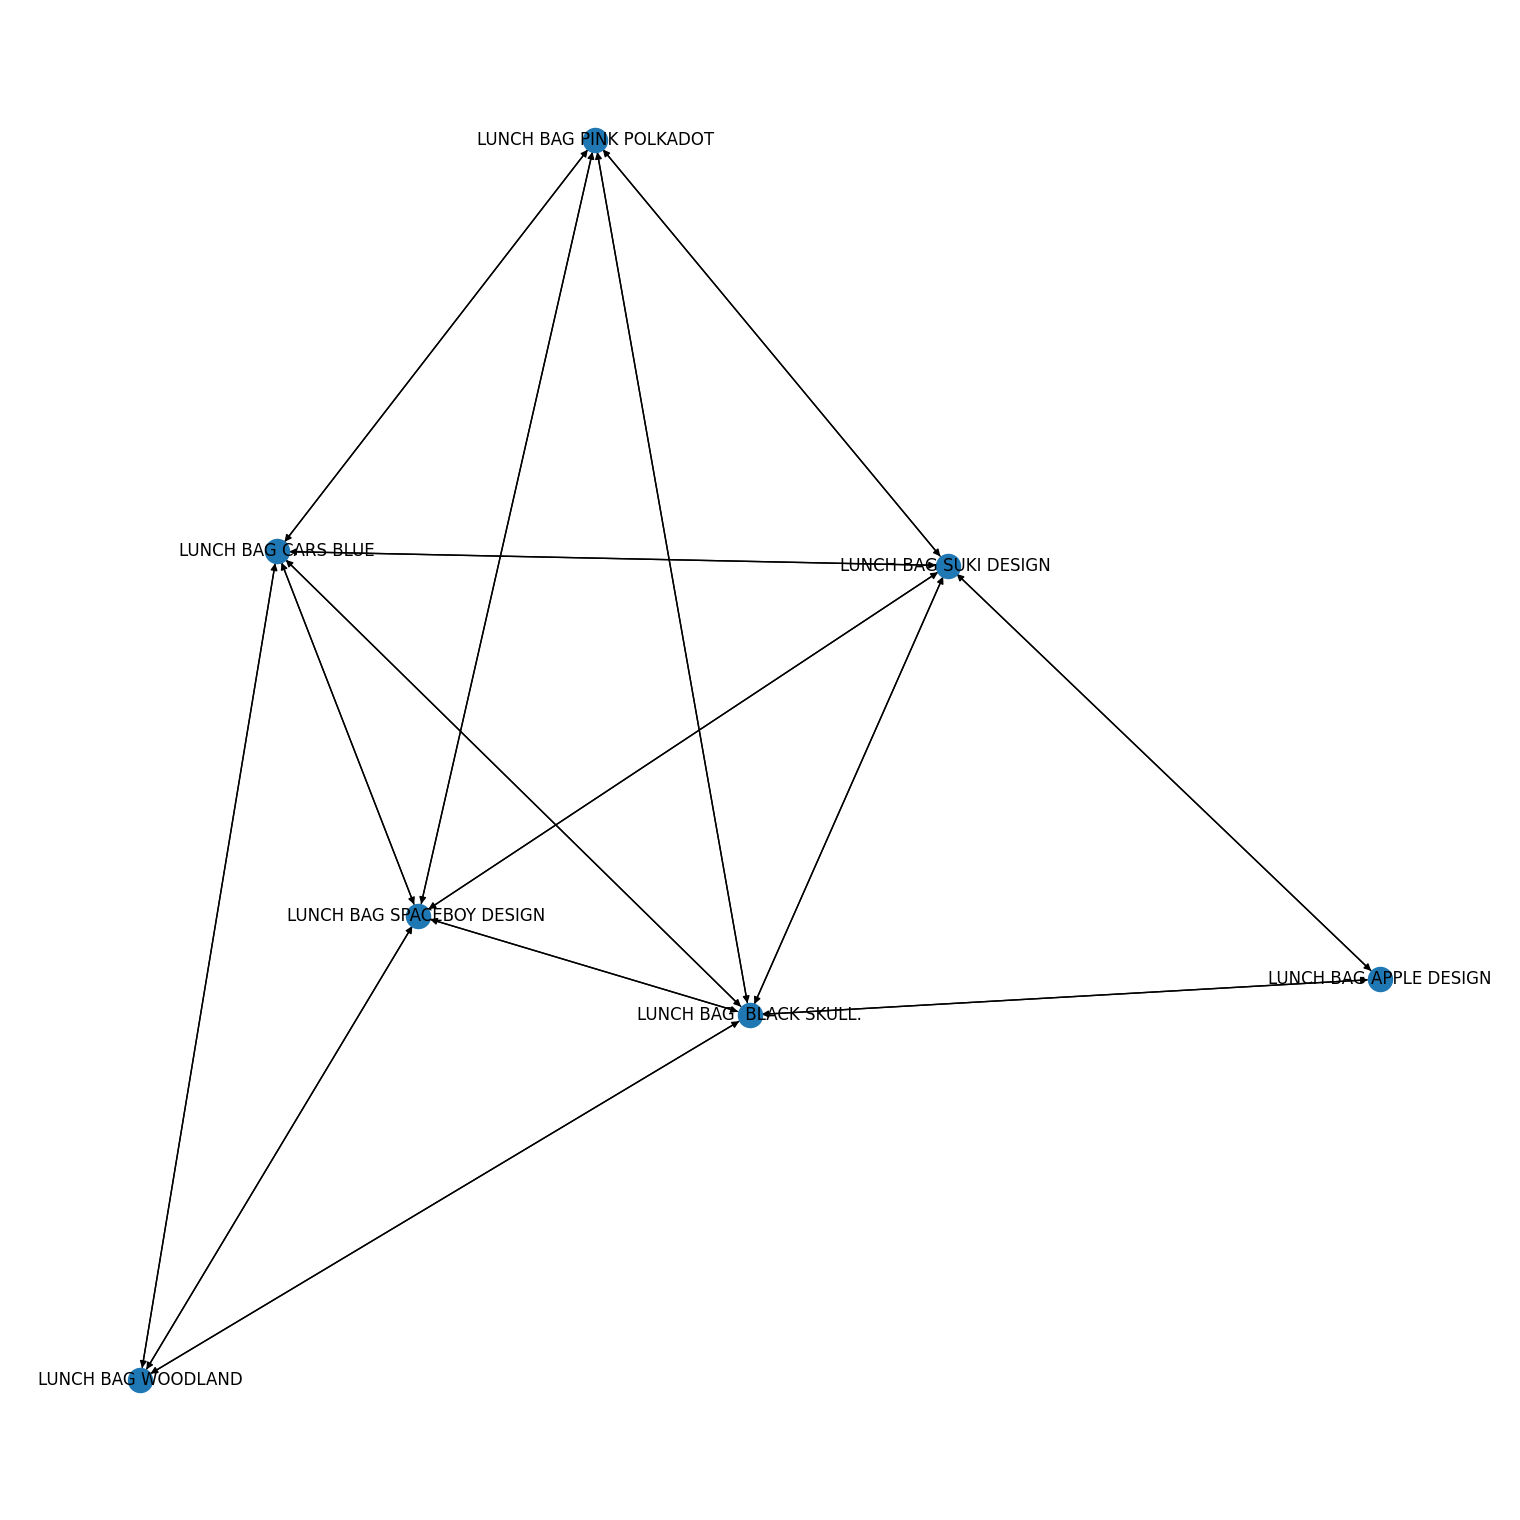

In [148]:
G=nx.DiGraph()
for idx in range(len(rules)):
    antecedents = list(rules.iloc[idx].antecedents)
    consequents = list(rules.iloc[idx].consequents)
    for i in range(len(antecedents)):
        x = antecedents[i]
        for j in range(len(consequents)):
            y = consequents[j]
            if x in product_3 and y in product_3:
                G.add_edges_from([(x,y)])
pos = nx.spring_layout(G, k = 0.3*1/np.sqrt(len(G.nodes())), iterations = 20)
plt.figure(3, figsize = (15, 15))
nx.draw(G, pos = pos)
nx.draw_networkx_labels(G, pos = pos)
plt.savefig("FP3.png", dpi = 300)
plt.show() # display